In [1]:
from __future__ import print_function, division

import sys

import pandas as pd
from pylab import rcParams

ROOT_PATH = '/Users/asapehrsson/dev/learn/hadoop_spark_jupyter/'

if not [x for x in sys.path if ROOT_PATH in x]:
    sys.path.append(ROOT_PATH + "/code")

import movielens_helper as mh

% matplotlib inline

rcParams['figure.figsize'] = 15, 5


In [2]:
data = pd.read_csv(ROOT_PATH + '/data/ml-latest-small/ratings.csv')

# short stats - length and first posts
type(data)
print(data.shape)
data.head()


(100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
#stats for all ratings in file. Interesting that mean is >3

data.rating.describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [4]:
#how many 5, 4 etc. At some point in time a 10-grade scale is introduced.

data.rating.value_counts().sort_index()

0.5     1101
1.0     3326
1.5     1687
2.0     7271
2.5     4449
3.0    20064
3.5    10538
4.0    28750
4.5     7723
5.0    15095
Name: rating, dtype: int64

In [5]:
#Add column with datetime and a grouping label, week
data = mh.add_year_week(data)
data.head()

,userId,movieId,rating,timestamp,datetime,y_w
0,1,31,2.5,1260759144,2009-12-14 03:52:24,200951
1,1,1029,3.0,1260759179,2009-12-14 03:52:59,200951
2,1,1061,3.0,1260759182,2009-12-14 03:53:02,200951
3,1,1129,2.0,1260759185,2009-12-14 03:53:05,200951
4,1,1172,4.0,1260759205,2009-12-14 03:53:25,200951


In [6]:
#Find the most active weeks

ratings = data\
    .groupby(mh.YEAR_WEEK_COL_NAME)\
    .count()\
    .sort_values(ascending=False, by='rating')

ratings.reset_index(inplace=True,drop=False)
ratings.head()



,y_w,userId,movieId,rating,timestamp,datetime
0,200047,2623,2623,2623,2623,2623
1,199950,1462,1462,1462,1462,1462
2,201104,1307,1307,1307,1307,1307
3,200512,1279,1279,1279,1279,1279
4,200031,1070,1070,1070,1070,1070


In [7]:
#compare with the least avtive. A big difference! 
ratings.tail()

,y_w,userId,movieId,rating,timestamp,datetime
993,201411,1,1,1,1,1
994,200029,1,1,1,1,1
995,200207,1,1,1,1,1
996,199614,1,1,1,1,1
997,200140,1,1,1,1,1


In [13]:

all_year_weeks = mh.prepare_all_year_weeks(data)
no_blanks_data = mh.fill_in_the_blanks(ratings, all_year_weeks)
#foo.head()
no_blanks_data = data\
    .groupby(mh.YEAR_WEEK_COL_NAME)\
    .count()

no_blanks_data.reset_index(inplace=True,drop=False)

no_blanks_data.head()


,y_w,userId,movieId,rating,timestamp,datetime
0,199502,3,3,3,3,3
1,199601,4,4,4,4,4
2,199613,116,116,116,116,116
3,199614,1,1,1,1,1
4,199615,191,191,191,191,191


In [11]:
no_blanks_data.rating.describe()

count     998.000000
mean      100.204409
std       174.672234
min         1.000000
25%        10.000000
50%        40.000000
75%       121.000000
max      2623.000000
Name: rating, dtype: float64

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


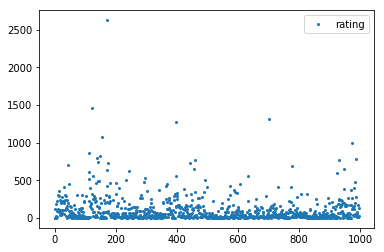

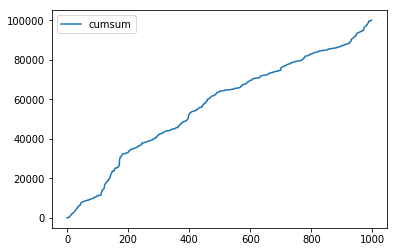

In [14]:

no_blanks_data.plot(y=["rating"], style="o", ms=2)
no_blanks_data.fillna(value=0, inplace=True)
#foo.plot(y=["avg"], kind='line')
#foo.plot(y=["avg"])



#accumulated no of rates
no_blanks_data['cumsum'] = no_blanks_data["rating"].cumsum()
no_blanks_data.plot(y=["cumsum"])

